# Analyzing COVID-19 Media Coverage

During times of public fear, communications are instrumental in preventing adverse consequences. COVID-19 media coverage has varied worldwide, with some outlets expressing skepticism and others advising caution. This project will be utilizing exploratory data analysis and text visualizations to understand how the media coverage varied over time and by outlet. 

## Importing the Data 

We will be using a dataset from **Kaggle** which contains articles about COVID-19 since January 2020. The dataset was produced by **Anacode**, a Berlin-based company, and might be more global & Euro-centric compared to mainstream news in the USA.

In [16]:
import pandas as pd
import numpy as np


In [7]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
api.dataset_download_files('jannalipenkova/covid19-public-media-dataset')


In [126]:
df = pd.read_csv('covid19-public-media-dataset/covid19_articles_20200512.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,title,author,date,domain,url,content,topic_area
0,My experience of surviving cancer twice,Helen Ziatyk,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,"“Helen, I’m so sorry to tell you that you have...",healthcare
1,Ginger: Health benefits and dietary tips,Jenna Fletcher,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/2659...,If you buy something through a link on this pa...,healthcare
2,China pneumonia outbreak may be caused by Sars...,Reuters,2020-01-08,theguardian,https://www.theguardian.com/science/2020/jan/0...,A cluster of more than 50 pneumonia cases in t...,general
3,New virus identified as likely cause of myster...,nature,2020-01-08,nature,https://www.nature.com/articles/d41586-020-000...,Passengers arriving at Hong Kong's internation...,science
4,China's Sars-like illness worries health exper...,https://www.theguardian.com/profile/sarahboseley,2020-01-09,theguardian,https://www.theguardian.com/world/2020/jan/09/...,The finding that the outbreak of viral pneumon...,general


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60896 entries, 0 to 60895
Data columns (total 7 columns):
title         60896 non-null object
author        49494 non-null object
date          60896 non-null object
domain        60896 non-null object
url           60896 non-null object
content       60896 non-null object
topic_area    60896 non-null object
dtypes: object(7)
memory usage: 3.3+ MB


## Data Manipulation

While the data is quite tidy (thanks Internet!), we'll need to convert the variables to forms that will be useful. 

In [130]:
# Converting Date into multiple components

df[['year','month', 'day']] = df.date.str.split("-",expand=True) 


In [56]:
df.head()

,title,author,date,domain,url,content,topic_area,year,month,day
0,My experience of surviving cancer twice,Helen Ziatyk,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,"“Helen, I’m so sorry to tell you that you have...",healthcare,2020,01,03
1,Ginger: Health benefits and dietary tips,Jenna Fletcher,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/2659...,If you buy something through a link on this pa...,healthcare,2020,01,03
2,China pneumonia outbreak may be caused by Sars...,Reuters,2020-01-08,theguardian,https://www.theguardian.com/science/2020/jan/0...,A cluster of more than 50 pneumonia cases in t...,general,2020,01,08
3,New virus identified as likely cause of myster...,nature,2020-01-08,nature,https://www.nature.com/articles/d41586-020-000...,Passengers arriving at Hong Kong's internation...,science,2020,01,08
4,China's Sars-like illness worries health exper...,https://www.theguardian.com/profile/sarahboseley,2020-01-09,theguardian,https://www.theguardian.com/world/2020/jan/09/...,The finding that the outbreak of viral pneumon...,general,2020,01,09


## Frequency Tables 

In order to fully understand our data, we'll need to run basic tabulations

In [57]:
df.shape

(60896, 10)

In [58]:
df.describe()

,title,author,date,domain,url,content,topic_area,year,month,day
count,60896,49494,60896,60896,60896,60896,60896,60896,60896,60896
unique,59963,8058,125,24,59900,60896,7,1,5,31
top,Coronavirus latest: at a glance | World news |...,https://www.facebook.com/bbcnews,2020-03-27,express,https://www.cnbc.com/2020/04/22/dow-futures-st...,Companies throughout the country trying to kee...,general,2020,03,27
freq,50,1282,1619,18585,6,1,30256,60896,26350,2742


Based on the above, we know the following:

- The dataset's most frequent news source is **Express**
- The most frequent "topic area" is **General**
- The date that had the highest article count was **March 27, 2020**. This was the same day the COVID relief bill was passed by the House of Representatives 

### Top Topic Areas


In [59]:
pd.crosstab(index=df["topic_area"],columns="count")

col_0,count
topic_area,
automotive,196
business,13117
finance,14195
general,30256
healthcare,40
science,530
tech,2562


### Top Domain Areas

In [60]:
pd.crosstab(index=df["domain"],columns="count")

col_0,count
domain,
altassets,22
bbc,1296
cnbc,10432
computerweekly,163
eenewsautomotive,9
emerj,8
engadget,214
express,18585
finsmes,54


### Dates with the Most Articles

In [101]:
df_plt = df["date"].value_counts()
df_plt = pd.DataFrame(data = df_plt)
df_plt.reset_index(inplace=True)
df_plt = df_plt.rename(columns={"index": "date", "date": "count"})
df_plt = df_plt.sort_values(by = ['date'])


#### Date Frequency Table

In [105]:
df_dttable = df_plt.sort_values(by = ['count'], ascending=False)
df_dttable.head(10)

,date,count
0,2020-03-27,1619
1,2020-03-19,1497
2,2020-03-26,1472
3,2020-03-25,1432
4,2020-03-24,1378
5,2020-03-18,1377
6,2020-03-31,1349
7,2020-04-02,1283
8,2020-03-30,1273
9,2020-03-17,1270


#### Line Graph

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


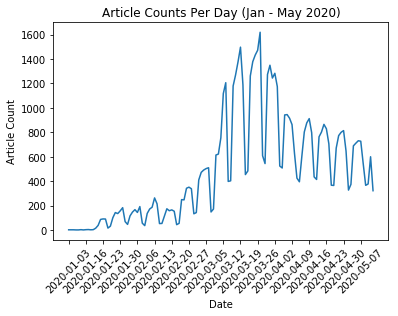

In [115]:
import matplotlib.pyplot as plt
x = df_plt["date"]
y = df_plt["count"]

plt.plot(x, y)
plt.title("Article Counts Per Day (Jan - May 2020)")
plt.xlabel("Date")
plt.ylabel("Article Count")

ax2 = plt.axes()
ax2.set_xticks(x[::7])
ax2.set_xticklabels(x[::7], rotation=45)


#plt.axis([0, 6, 0, 20])
plt.show()

## Text Mining & Visualization

By using the **WordCloud** package, we can break down the content of articles and visualize the most frequently used words (excluding "stopwords" such as "they", "the", "and", etc.). When we compare the wordclouds between January and May, there's an immediate shift from reporting on China to a more global response.

In [133]:
jan = df[df.month == '01']
feb = df[df.month == '02']
mar = df[df.month == '03']
apr = df[df.month == '04']
may = df[df.month == '05']

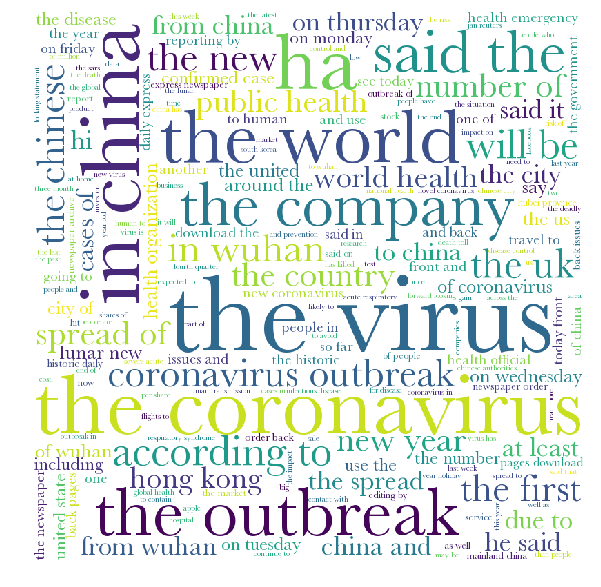

In [145]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = '' 
stopwords = set(STOPWORDS) 
  
for title in jan["content"]:
    title = str(title)
    title_token = title.split()
    for i in range(len(title_token)): 
        title_token[i] = title_token[i].lower() 
    comment_words += " ".join(title_token)+" "

wordcloud = WordCloud(font_path= '/Library/Fonts/Baskerville.ttc', width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

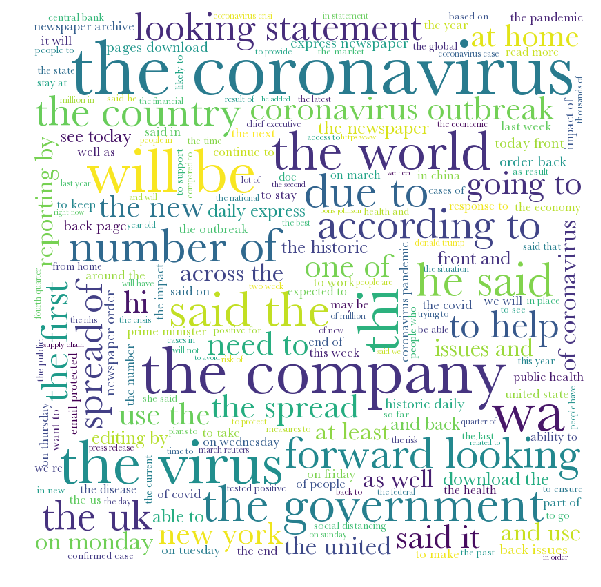

In [146]:

comment_words = '' 
stopwords = set(STOPWORDS) 
  
for title in mar["content"]:
    title = str(title)
    title_token = title.split()
    for i in range(len(title_token)): 
        title_token[i] = title_token[i].lower() 
    comment_words += " ".join(title_token)+" "

wordcloud = WordCloud(font_path= '/Library/Fonts/Baskerville.ttc', width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()